In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

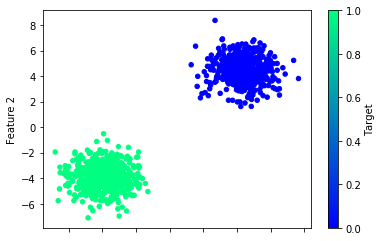

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Plotting the dummy data
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit scaler
X_scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add first Dense layer, including input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [7]:
# Add output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
# Check structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Fit model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/sample - loss: 0.7855 - accuracy: 0.0160
Epoch 2/100
750/750 [==============================] - 0s 108us/sample - loss: 0.7693 - accuracy: 0.0000e+00
Epoch 3/100
750/750 [==============================] - 0s 103us/sample - loss: 0.7550 - accuracy: 0.0000e+00
Epoch 4/100
750/750 [==============================] - 0s 99us/sample - loss: 0.7426 - accuracy: 0.0000e+00
Epoch 5/100
750/750 [==============================] - 0s 90us/sample - loss: 0.7311 - accuracy: 0.0000e+00
Epoch 6/100
750/750 [==============================] - 0s 88us/sample - loss: 0.7211 - accuracy: 0.0000e+00
Epoch 7/100
750/750 [==============================] - 0s 89us/sample - loss: 0.7119 - accuracy: 0.0000e+00
Epoch 8/100
750/750 [==============================] - 0s 96us/sample - loss: 0.7034 - accuracy: 0.0200
Epoch 9/100
750/750 [==============================] - 0s 86us/sample - loss: 0.6953 - accuracy: 0.4480
Epoch 10/100
750/7

Epoch 78/100
750/750 [==============================] - 0s 95us/sample - loss: 0.1214 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 79us/sample - loss: 0.1192 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 83us/sample - loss: 0.1170 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 84us/sample - loss: 0.1149 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 83us/sample - loss: 0.1129 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 78us/sample - loss: 0.1109 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 83us/sample - loss: 0.1089 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 86us/sample - loss: 0.1070 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 84us/sample - loss: 0.1051 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] -

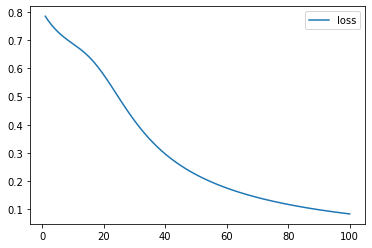

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

# Plot the loss
history_df.plot(y='loss')

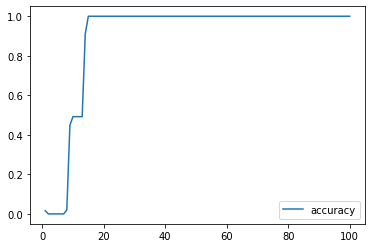

In [12]:
#  Plot the accuracy
history_df.plot(y='accuracy')

In [13]:
# Evaluate the model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

250/1 - 0s - loss: 0.0691 - accuracy: 1.0000
Loss: 0.07854499852657318, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

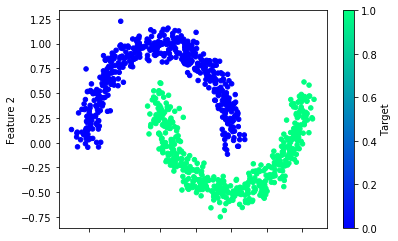

In [15]:
from sklearn.datasets import make_moons

# Create dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=1)

# Transform y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Create DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df_moons['Target'] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=1)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit scaler
X_moon_scaler.fit(X_moon_train)

# Scale data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Train model with nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 176us/sample - loss: 0.7497 - accuracy: 0.7107
Epoch 2/100
750/750 [==============================] - 0s 114us/sample - loss: 0.7018 - accuracy: 0.7147
Epoch 3/100
750/750 [==============================] - 0s 110us/sample - loss: 0.6647 - accuracy: 0.7253
Epoch 4/100
750/750 [==============================] - 0s 107us/sample - loss: 0.6374 - accuracy: 0.7253
Epoch 5/100
750/750 [==============================] - 0s 110us/sample - loss: 0.6161 - accuracy: 0.7267
Epoch 6/100
750/750 [==============================] - 0s 108us/sample - loss: 0.5996 - accuracy: 0.7293
Epoch 7/100
750/750 [==============================] - 0s 105us/sample - loss: 0.5854 - accuracy: 0.7320
Epoch 8/100
750/750 [==============================] - 0s 105us/sample - loss: 0.5730 - accuracy: 0.7373
Epoch 9/100
750/750 [==============================] - 0s 115us/sample - loss: 0.5620 - accuracy: 0.7427
Epoch 10/100
750/750 [============

750/750 [==============================] - 0s 114us/sample - loss: 0.3331 - accuracy: 0.8440
Epoch 79/100
750/750 [==============================] - 0s 97us/sample - loss: 0.3314 - accuracy: 0.8453
Epoch 80/100
750/750 [==============================] - 0s 96us/sample - loss: 0.3297 - accuracy: 0.8427
Epoch 81/100
750/750 [==============================] - 0s 89us/sample - loss: 0.3280 - accuracy: 0.8440
Epoch 82/100
750/750 [==============================] - 0s 88us/sample - loss: 0.3265 - accuracy: 0.8440
Epoch 83/100
750/750 [==============================] - 0s 91us/sample - loss: 0.3249 - accuracy: 0.8440
Epoch 84/100
750/750 [==============================] - 0s 89us/sample - loss: 0.3233 - accuracy: 0.8480
Epoch 85/100
750/750 [==============================] - 0s 89us/sample - loss: 0.3219 - accuracy: 0.8493
Epoch 86/100
750/750 [==============================] - 0s 90us/sample - loss: 0.3204 - accuracy: 0.8480
Epoch 87/100
750/750 [==============================] - 0s 88us/sam

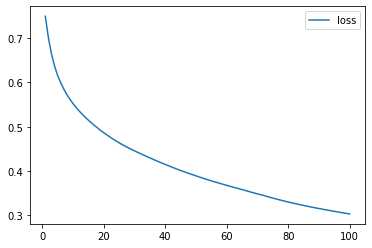

In [18]:
# Create DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history['loss'])+1))

# Plot DataFrame
history_df.plot(y='loss')

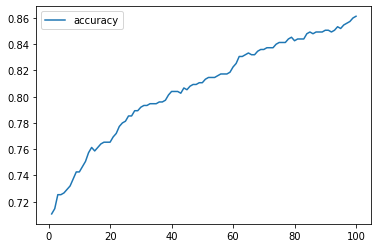

In [19]:
# Plot accuracy
history_df.plot(y='accuracy')

In [20]:
# Generate new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

# Add the output layer that uses a probability activity function
new_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 1.3865 - accuracy: 0.5307
Epoch 2/100
750/750 [==============================] - 0s 130us/sample - loss: 1.2649 - accuracy: 0.5467
Epoch 3/100
750/750 [==============================] - 0s 114us/sample - loss: 1.1525 - accuracy: 0.5587
Epoch 4/100
750/750 [==============================] - 0s 103us/sample - loss: 1.0498 - accuracy: 0.5667
Epoch 5/100
750/750 [==============================] - 0s 121us/sample - loss: 0.9585 - accuracy: 0.5747
Epoch 6/100
750/750 [==============================] - 0s 131us/sample - loss: 0.8760 - accuracy: 0.5867
Epoch 7/100
750/750 [==============================] - 0s 100us/sample - loss: 0.8038 - accuracy: 0.5973
Epoch 8/100
750/750 [==============================] - 0s 105us/sample - loss: 0.7406 - accuracy: 0.6053
Epoch 9/100
750/750 [==============================] - 0s 107us/sample - loss: 0.6850 - accuracy: 0.6147
Epoch 10/100
750/750 [==============

750/750 [==============================] - 0s 113us/sample - loss: 0.2584 - accuracy: 0.8827
Epoch 79/100
750/750 [==============================] - 0s 94us/sample - loss: 0.2582 - accuracy: 0.8813
Epoch 80/100
750/750 [==============================] - 0s 98us/sample - loss: 0.2580 - accuracy: 0.8800
Epoch 81/100
750/750 [==============================] - 0s 94us/sample - loss: 0.2578 - accuracy: 0.8813
Epoch 82/100
750/750 [==============================] - 0s 99us/sample - loss: 0.2577 - accuracy: 0.8813
Epoch 83/100
750/750 [==============================] - 0s 95us/sample - loss: 0.2575 - accuracy: 0.8813
Epoch 84/100
750/750 [==============================] - 0s 99us/sample - loss: 0.2573 - accuracy: 0.8813
Epoch 85/100
750/750 [==============================] - 0s 97us/sample - loss: 0.2571 - accuracy: 0.8813
Epoch 86/100
750/750 [==============================] - 0s 99us/sample - loss: 0.2570 - accuracy: 0.8813
Epoch 87/100
750/750 [==============================] - 0s 96us/sam